<a href="https://colab.research.google.com/github/XiaoTanOvO/Financial-market-overview-and-data-collection-and-preprocessing/blob/main/%E9%87%91%E8%9E%8D%E5%B8%82%E5%A0%B4%E6%A6%82%E8%BF%B0%E8%88%87%E8%B3%87%E6%96%99%E6%94%B6%E9%9B%86%E5%8F%8A%E9%A0%90%E8%99%95%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
!pip install requests beautifulsoup4 yfinance matplotlib

# 1. 證交所資訊

In [52]:
# 用於發送HTTP請求來獲取網頁內容。
import requests
# 用於解析HTML文件。
from bs4 import BeautifulSoup
# 用於資料操作，特別是表格資料的處理。
import pandas as pd
# 用於繪製圖表。
import matplotlib.pyplot as plt


# 定義爬取資料的函式

# 定義一個函數它接收兩個參數：股票代碼和查詢日期，用於從台灣證券交易所爬取股價資料。
def get_twse_stock_data(stock_id, date):
  # 生成目標URL，用於請求特定股票在指定日期的日線交易資料。
  url = f"https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date={date}&stockNo={stock_id}"
  # 發送HTTP GET請求，並獲取該URL的回應。
  response = requests.get(url)
  # 解析HTML內容，方便後續提取需要的數據。
  soup = BeautifulSoup(response.text, 'html.parser')

  # 檢查html的格式(tr、td、th等)
  # table = soup.find_all('table')
  # print(table)

  # 解析表格資料

  # 從表格中提取所有的行（tr），這些行包含了每一天的股價資料。
  rows = soup.find_all('tr')
  # 初始化一個空的列表data，用來存儲每一行提取出來的股價資料。
  data = []

  # 遍歷表格中的所有行，跳過前兩行，因為它們是標題或欄位名稱。
  for row in rows[2:]:
    # 從每一行提取所有單元格（td），這些單元格包含了具體的股價數據。
    cols = row.find_all('td')
    # 遍歷提取的單元格，去除每個單元格中的空白字符，提取純文本。
    cols = [col.text.strip() for col in cols]
    # 檢查是否為有效非空的數據行，有數據就將添加到data列表中。
    if len(cols) > 0:
      data.append(cols)

  # 建立 DataFrame

  # 我們選取列表中的第二行（index為1），這是表格的欄位名稱，然後查找所有的欄位名稱單元格（th），結果存儲在列表，這些元素對應於表格的每一列名稱。
  header = rows[1].find_all('th')
  # 遍歷提取的單元格，去除每個單元格中的空白字符，提取純文本。
  columns = [th.text.strip() for th in header]
  # columns = ['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數']
  # 將列表轉換成pandas DataFrame，並將剛才定義的列名稱分配給DataFrame的列。
  df = pd.DataFrame(data, columns=columns)

  # 轉換數據類型
  df['日期'] = df['日期'].str.replace(',', '')
  df['成交股數'] = df['成交股數'].str.replace(',', '').astype(int)
  df['成交金額'] = df['成交金額'].str.replace(',', '').astype(int)
  df['開盤價'] = df['開盤價'].str.replace(',', '').astype(float)
  df['最高價'] = df['最高價'].str.replace(',', '').astype(float)
  df['最低價'] = df['最低價'].str.replace(',', '').astype(float)
  df['收盤價'] = df['收盤價'].str.replace(',', '').astype(float)
  df['漲跌價差'] = df['漲跌價差'].str.replace(',', '')
  df['成交筆數'] = df['成交筆數'].str.replace(',', '').astype(int)

  return df

stock_id = '2330'  # 台積電
date = '20240901'  # 查詢日期
# 呼叫剛才定義的函數來獲取指定股票在特定日期的交易數據，並將結果存儲。
twse_df = get_twse_stock_data(stock_id, date)
twse_df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,113/09/02,19272593,18270058260,950.0,955.0,943.0,948.0,+4.00,31642
1,113/09/03,23205623,21908471541,948.0,952.0,939.0,940.0,-8.00,47139
2,113/09/04,93169835,83424133824,894.0,905.0,888.0,889.0,-51.00,393210
3,113/09/05,34147890,30998595394,907.0,915.0,900.0,902.0,+13.00,63902
4,113/09/06,28248063,25786016936,909.0,918.0,903.0,918.0,+16.00,38415
5,113/09/09,38448946,34456838126,892.0,900.0,891.0,899.0,-19.00,102365
6,113/09/10,34312646,31067424234,907.0,911.0,901.0,904.0,+5.00,45141
7,113/09/11,19513256,17621000956,906.0,906.0,900.0,901.0,-3.00,30789
8,113/09/12,43749260,40999951508,936.0,944.0,928.0,940.0,X0.00,80643
9,113/09/13,28307441,26795862243,955.0,955.0,939.0,947.0,+7.00,39071


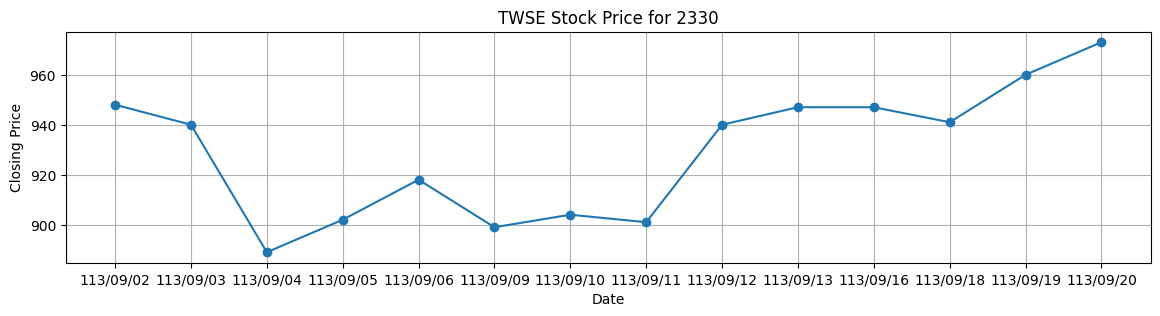

In [53]:
# 可視化
plt.figure(figsize=(14, 3))
plt.plot(twse_df['日期'], twse_df['收盤價'], marker='o', linestyle='-')
plt.title(f'TWSE Stock Price for {stock_id}')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# 2. Yahoo股市資訊

In [71]:
# 使用Yahoo Finance API來獲取股票資料。
import yfinance as yf

# 定義一個函數它接收一個參數：股票代號，用於從Yahoo Finance爬取股價資料。
def get_yahoo_stock_data(ticker):
  # 創建了一個股票代號的物件，允許我們訪問該股票的歷史數據、基本面資料等。
  stock = yf.Ticker(ticker)
  # 獲取該股票過去一個月(1mo)的歷史股價數據，並將結果存儲。period參數可以設置不同的時間範圍，如'1d'、'5d'、'1mo'、'1y'等。
  df = stock.history(period="1mo")
  # 重置時間索引並轉換為列。
  df = df.reset_index()
  # 刪除原本的列名稱並設定新的列名稱。
  new_columns = ['日期', '開盤價', '最高價', '最低價', '收盤價', '成交量', '股利', '股票分割']
  df.columns = new_columns  # 設置新的列名稱
  return df

ticker = "2330.TW"  # 台積電在 Yahoo 的代號
# 呼叫剛才定義的函數來獲取指定股票過去一個月的歷史股價數據，並將結果存儲。
yahoo_df = get_yahoo_stock_data(ticker)
yahoo_df

,日期,開盤價,最高價,最低價,收盤價,成交量,股利,股票分割
0,2024-08-20 00:00:00+08:00,972.662478,972.662478,963.702435,968.680237,24039959,0.000000,0.0
1,2024-08-21 00:00:00+08:00,956.733507,959.720188,951.755705,953.746826,29758188,0.000000,0.0
2,2024-08-22 00:00:00+08:00,953.746816,959.720178,943.791212,946.777893,24349754,0.000000,0.0
3,2024-08-23 00:00:00+08:00,939.808942,947.773424,934.831140,944.786743,27592153,0.000000,0.0
4,2024-08-26 00:00:00+08:00,952.751271,956.733513,940.804547,945.782349,25057581,0.000000,0.0
5,2024-08-27 00:00:00+08:00,940.804552,941.800113,935.826750,937.817871,18693037,0.000000,0.0
6,2024-08-28 00:00:00+08:00,940.804508,959.720154,938.813387,959.720154,31059233,0.000000,0.0
7,2024-08-29 00:00:00+08:00,937.817855,942.795657,932.840053,938.813416,43530708,0.000000,0.0
8,2024-08-30 00:00:00+08:00,939.808960,947.773443,936.822279,939.808960,63834981,0.000000,0.0
9,2024-09-02 00:00:00+08:00,945.782319,950.760121,938.813397,943.791199,18646835,0.000000,0.0


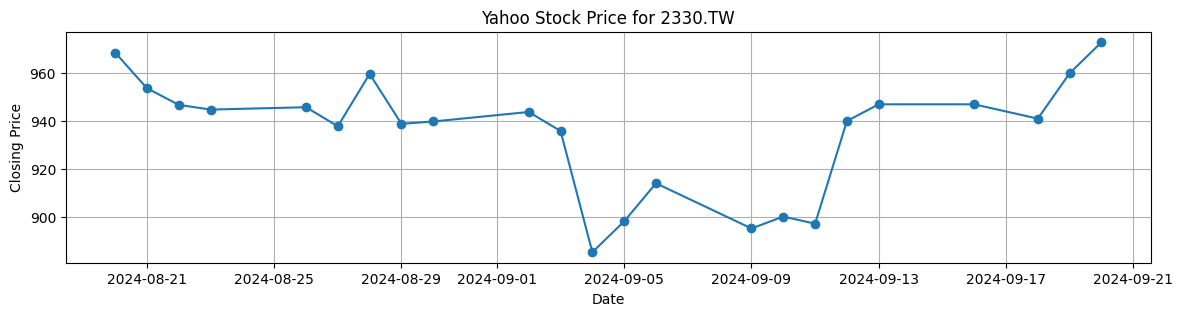

In [67]:
# 可視化
plt.figure(figsize=(14, 3))
plt.plot(yahoo_df.index, yahoo_df['Close'], marker='o', linestyle='-')
plt.title(f'Yahoo Stock Price for {ticker}')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()